## Create a new database named "Zomatosqlproject"

### Copy Paster the following code to enter data into the database & create new tables
drop table if exists goldusers_signup;
CREATE TABLE goldusers_signup(userid integer,gold_signup_date date); 

INSERT INTO goldusers_signup(userid,gold_signup_date) 
 VALUES (1,'09-22-2017'),
(3,'04-21-2017');

drop table if exists users;
CREATE TABLE users(userid integer,signup_date date); 

INSERT INTO users(userid,signup_date) 
 VALUES (1,'09-02-2014'),
(2,'01-15-2015'),
(3,'04-11-2014');

drop table if exists sales;
CREATE TABLE sales(userid integer,created_date date,product_id integer); 

INSERT INTO sales(userid,created_date,product_id) 
 VALUES (1,'04-19-2017',2),
(3,'12-18-2019',1),
(2,'07-20-2020',3),
(1,'10-23-2019',2),
(1,'03-19-2018',3),
(3,'12-20-2016',2),
(1,'11-09-2016',1),
(1,'05-20-2016',3),
(2,'09-24-2017',1),
(1,'03-11-2017',2),
(1,'03-11-2016',1),
(3,'11-10-2016',1),
(3,'12-07-2017',2),
(3,'12-15-2016',2),
(2,'11-08-2017',2),
(2,'09-10-2018',3);


drop table if exists product;
CREATE TABLE product(product_id integer,product_name text,price integer); 

INSERT INTO product(product_id,product_name,price) 
 VALUES
(1,'p1',980),
(2,'p2',870),
(3,'p3',330);


select * from sales;
select * from product;
select * from goldusers_signup;
select * from users;

## Q1) What is the total amount each customer spent on zomato ?

### SELECT a.userid, a.product_id,b.price FROM sales a INNER JOIN product b ON a.product_id=b.product_id;
This will bring us the order id, product id & price, now we will group them so that we get the total amount spent

### 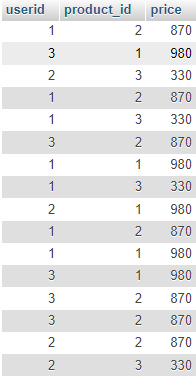

### As you can see the total amount spent by each customer as shown below
SELECT a.userid,sum(b.price) total_amt_spent FROM sales a INNER JOIN product b ON a.product_id=b.product_id
GROUP BY a.userid;

### 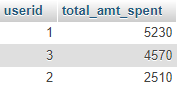

## Q2) How many days has each customer visited zomato ?

### 
SELECT userid, COUNT(DISTINCT created_date) distinct_days FROM sales
GROUP BY userid;

## Q3) What is the most purchased item on the menu & how many times it was purchased by all customers ?

### 
SELECT product_id, COUNT(product_id) FROM sales
GROUP BY product_id
ORDER BY COUNT(product_id) DESC;

### 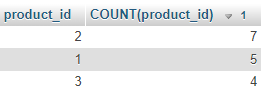

### As we can see that product id 2 is the most purchased item on the menu
SELECT product_id, COUNT(product_id) cnt FROM sales
GROUP BY product_id
ORDER BY COUNT(product_id) DESC LIMIT 1;

### 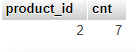

### 
SELECT userid, COUNT(product_id) cnt FROM sales 
WHERE product_id=(SELECT product_id FROM sales
GROUP BY product_id
ORDER BY COUNT(product_id) DESC LIMIT 1)
GROUP BY userid;

### 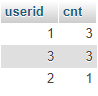

## Q4) Which item was first purchased by customer after they become a member ?

### 
SELECT a.userid, a.created_date, a.product_id, b.gold_signup_date 
FROM sales a INNER JOIN goldusers_signup b on a.userid=b.userid;